In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('HousePrices.csv')
df1.head()

,Price,Location,Area,Amenities,BHK
0,₹6.50 Cr,"Andheri East., Andheri East, Mumbai - Western ...",2300sqft,"Lift,Power Back Up,Park,",4 BHK
1,₹4.0 Cr,"Malad West, Mumbai, Kanchpada, Mumbai - North ...",1226sqft,NaN,4 BHK
2,₹12.0 Cr,"Andheri West, Mumbai, Lokhandwala Complex, Mum...",3050sqft,NaN,4 BHK
3,₹5.0 Cr,Aarti Building Arya Nagar Tulsiwadi Tardeo Mum...,750sqft,NaN,2 BHK
4,₹4.06 Cr,"Malad West, Mumbai, Kanchpada, Mumbai - North ...",1320sqft,NaN,4 BHK


In [32]:
df1.shape

(6726, 5)

In [3]:
df1['BHK'].value_counts()

4 BHK    1500
3 BHK    1500
2 BHK    1499
1 BHK    1080
5 BHK     752
6 BHK     258
8 BHK      59
7 BHK      49
0 BHK      23
9 BHK       6
Name: BHK, dtype: int64

In [4]:
(df1['Location'].value_counts()>10).sum()

71

In [31]:
df1['Amenities'].isnull().sum()

6725

In [5]:
for i in df1['Price']:
    if 'Cr' not in i and 'Lac' not in i and 'Call for Price' not in i:
        print(i)
        break

In [8]:
for i in df1['Area']:
    i = str(i)
    if 'sqft' not in i and '' not in i:
        print(i)
        break

In [9]:
df2 = df1.copy()
df2['Area'] = pd.to_numeric(df2['Area'].str.replace('[^.0-9]', ''))
df2['Area']

C:\Users\abdea\AppData\Local\Temp\ipykernel_8172\2876042804.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Area'] = pd.to_numeric(df2['Area'].str.replace('[^.0-9]', ''))


0       2300.0
1       1226.0
2       3050.0
3        750.0
4       1320.0
         ...  
6721    1250.0
6722     323.0
6723     995.0
6724    1688.0
6725    1200.0
Name: Area, Length: 6726, dtype: float64

In [12]:
def convert_price(value):
    if 'Cr' in value:
        new_value1 = re.sub(re.compile('[^.0-9]'), '', value)
        return float(new_value1)*100
    elif 'Lac' in value:
        new_value2 = re.sub(re.compile('[^.0-9]'), '', value)
        return float(new_value2)
    else:
        return None
df3 = df2.copy()
df3['Price'] = df3['Price'].apply(convert_price)
df3['Price']

0        650.0
1        400.0
2       1200.0
3        500.0
4        406.0
         ...  
6721     675.0
6722      64.0
6723     180.0
6724     150.0
6725     110.0
Name: Price, Length: 6726, dtype: float64

In [15]:
df4 = df3.copy()
df4['BHK'] = pd.to_numeric(df4['BHK'].str.replace('[^.0-9]', ''))
df4['BHK']

0       4
1       4
2       4
3       2
4       4
       ..
6721    4
6722    1
6723    3
6724    3
6725    3
Name: BHK, Length: 6726, dtype: int64

In [34]:
df5 = df4.copy()
df5 = df5.drop('Amenities',axis=1)

In [36]:
df6 = df5.copy()
Location_stats = df6['Location'].value_counts(ascending=False)
Location_stats_less_than_10 = Location_stats[Location_stats<=10]
df6.Location = df6.Location.apply(lambda x : 'other' if x in Location_stats_less_than_10 else x)
dummies = pd.get_dummies(df6.Location)
df6 = pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')
df6 = df6.dropna()
df6.shape

(6611, 75)

In [49]:
df6.groupby(['BHK']).mean()[['Price']]

,Price
BHK,
0,5309.210526
1,107.272600
2,219.031992
3,406.787676
4,840.432302
5,1714.087569
6,2044.694444
7,2373.627907
8,3192.909091


In [54]:
df6 = df6[df6['BHK']>0]
df6['BHK'].unique()

array([4, 2, 1, 5, 6, 3, 8, 7, 9], dtype=int64)

<AxesSubplot:>

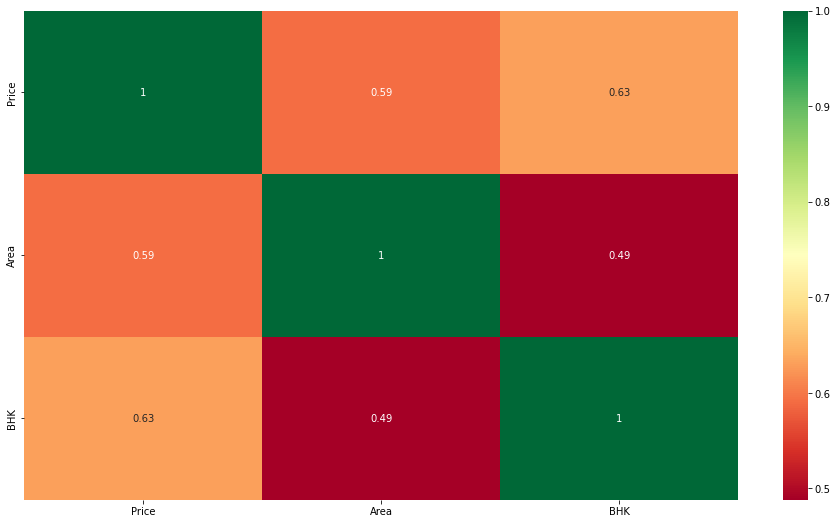

In [55]:
df_temp = df6[['Price','Area','BHK']]
plt.figure(figsize=(16,9))
sns.heatmap(df_temp.corr(),cmap='RdYlGn',annot=True)

In [62]:
df6.groupby(['Location']).mean()[['Price']].sort_values(by='Price',ascending=False).head(20)

,Price
Location,
"Lower Parel, Mumbai - South Mumbai, Maharashtra",3279.166667
"Worli, Mumbai - South Mumbai, Maharashtra",2332.761905
"worli, Worli, Mumbai - South Mumbai, Maharashtra",2287.466667
"Prabhadevi, Mumbai - South Mumbai, Maharashtra",2156.736842
"Prabhadevi, Mumbai, Prabhadevi, Mumbai - South Mumbai, Maharashtra",2076.103448
"Lower Parel, Mumbai, Lower Parel, Mumbai - South Mumbai, Maharashtra",1883.928571
"Jivraj Ramji Boricha Rd, Shastri Nagar, Adarsh Nagar, Lower Parel, Mumbai, Mahalakshmi, Mumbai - South Mumbai, Maharashtra",1681.818182
"Worli, Mumbai, Worli, Mumbai - South Mumbai, Maharashtra",1634.921260
"Gokhale Rd S, Prabhadevi, Mumbai, Maharashtra, Prabhadevi, Mumbai - South Mumbai, Maharashtra",1599.533333
